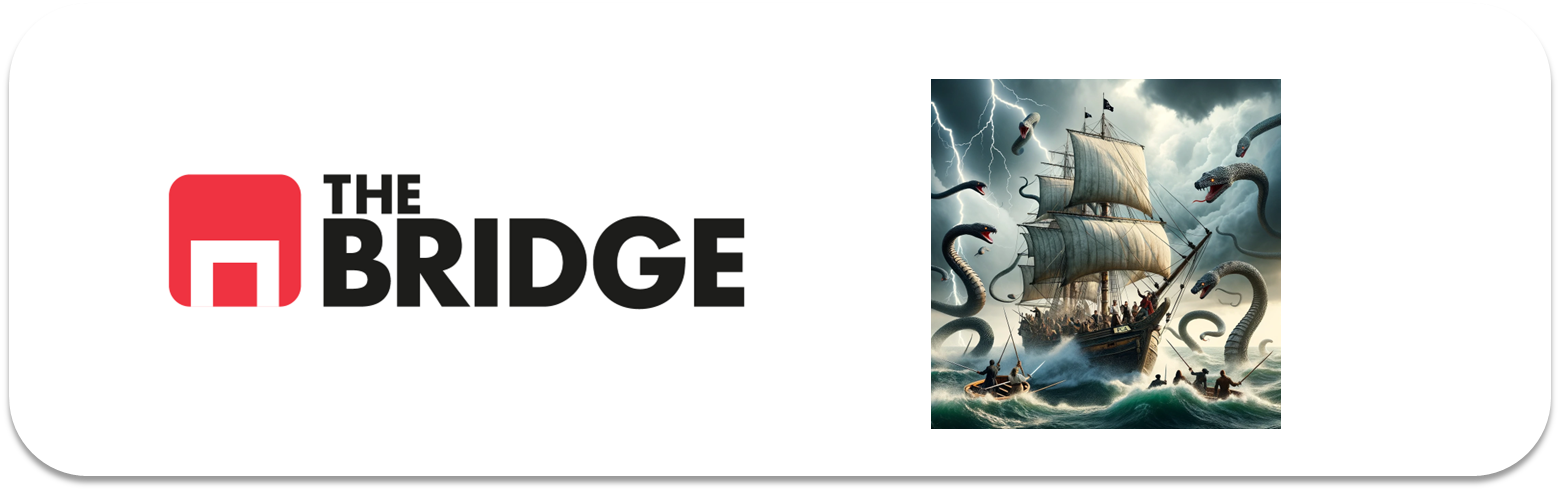

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [103]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import SelectKBest, f_classif,  mutual_info_classif,SelectFromModel, RFE, SequentialFeatureSelector
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [104]:
df = pd.read_csv('data/credit_npo.csv')
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [106]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


### 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.


In [107]:
df.dropna(inplace=True)

In [108]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
target = 'SeriousDlqin2yrs'

### 2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 


**1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.**

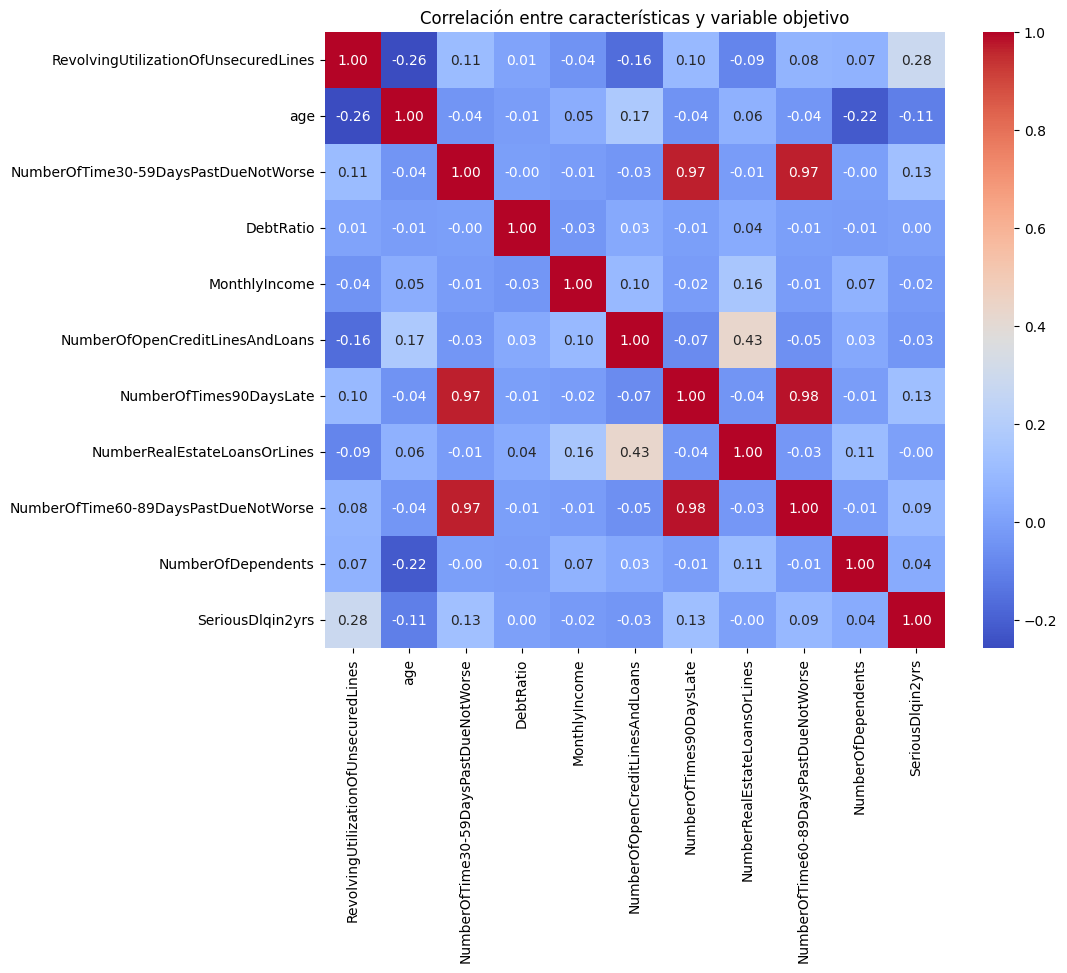

In [110]:
# Agregar la variable objetivo al DataFrame
df_train = X_train.copy()
df_train['SeriousDlqin2yrs'] = y_train

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Trazar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre características y variable objetivo')
plt.show()

In [111]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

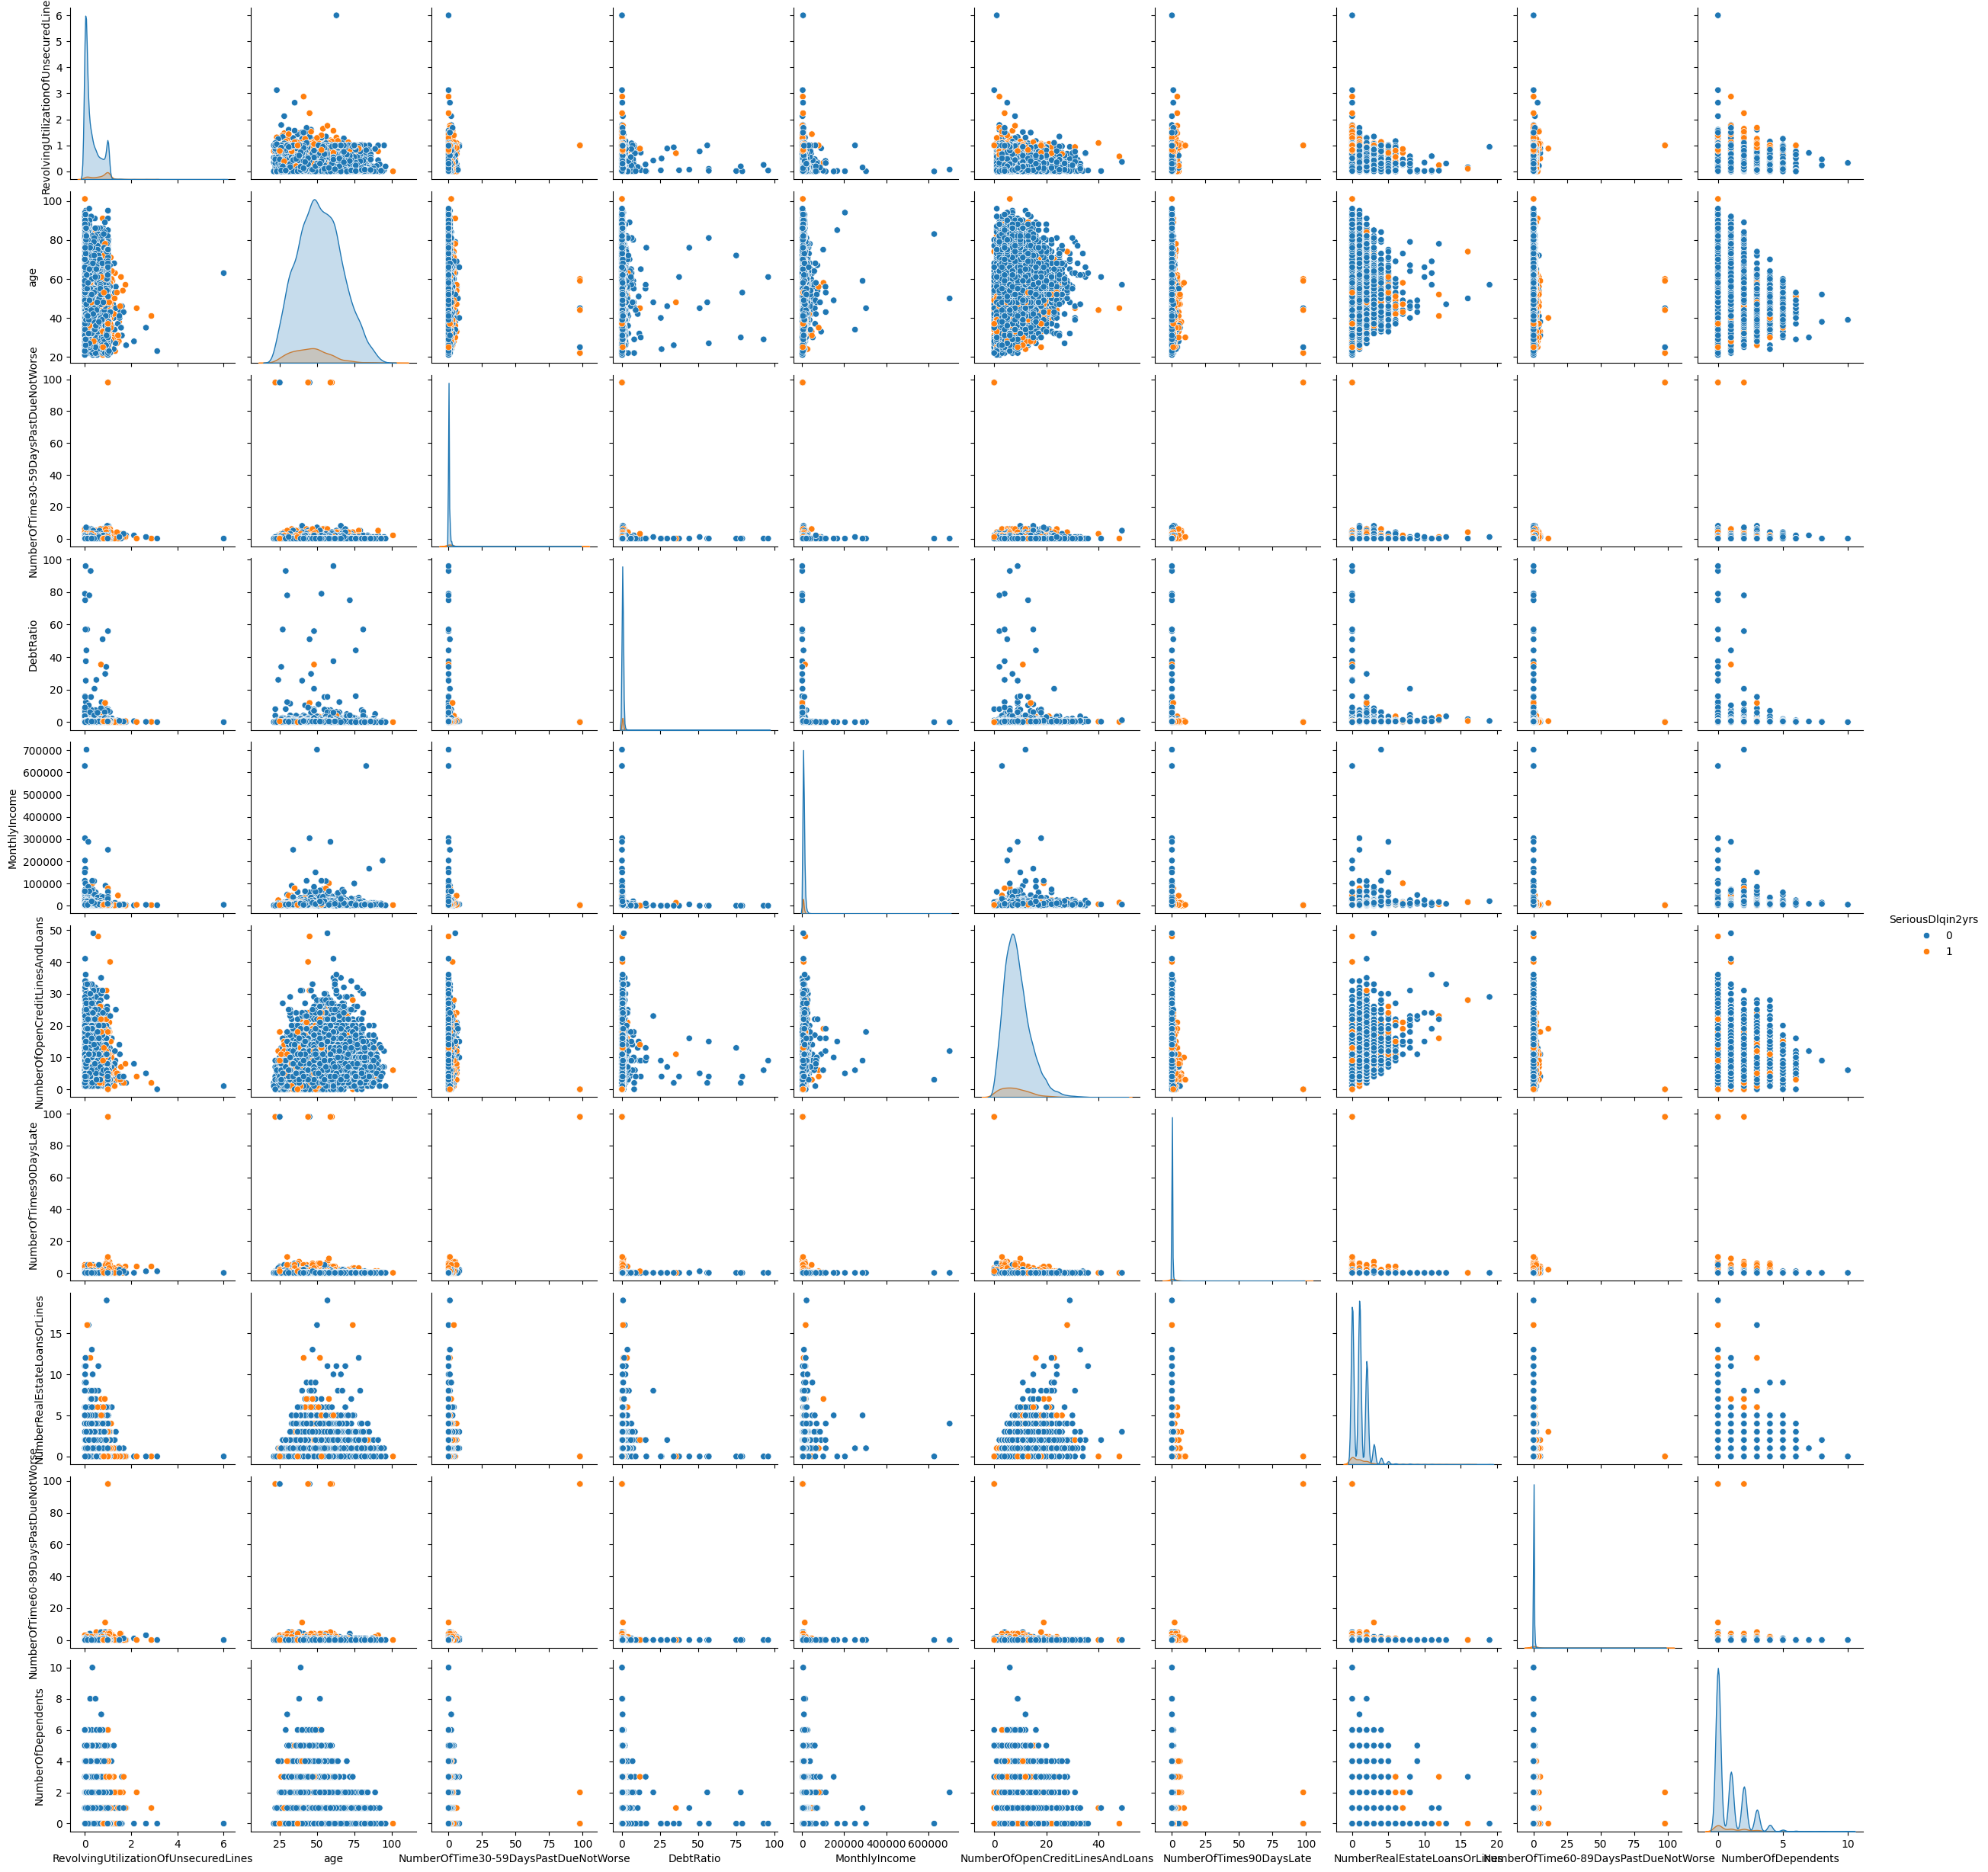

In [112]:
# Ejemplo de visualización usando pairplot de seaborn
sns.pairplot(df_train, hue='SeriousDlqin2yrs', diag_kind='kde')
plt.show()


In [113]:

# Paso 2: Calcular la matriz de correlación
correlation_matrix = df_train.corr()


In [114]:
# Paso 3: Establecer umbrales de correlación y covarianza
correlation_threshold = 0.2
covariance_threshold = 0.1

# Filtrar características basadas en los umbrales establecidos
selected_features = correlation_matrix[(correlation_matrix['SeriousDlqin2yrs'].abs() > correlation_threshold) & 
                                       (correlation_matrix['SeriousDlqin2yrs'].abs() > covariance_threshold)].index.tolist()


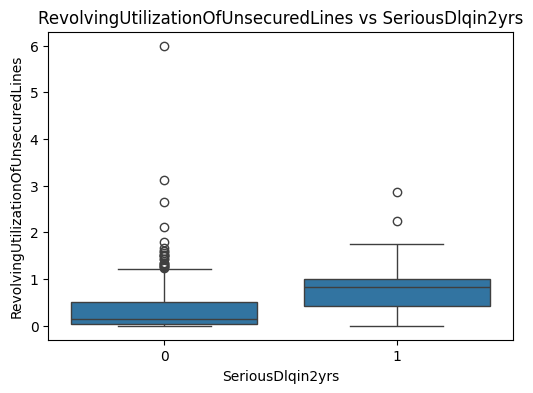

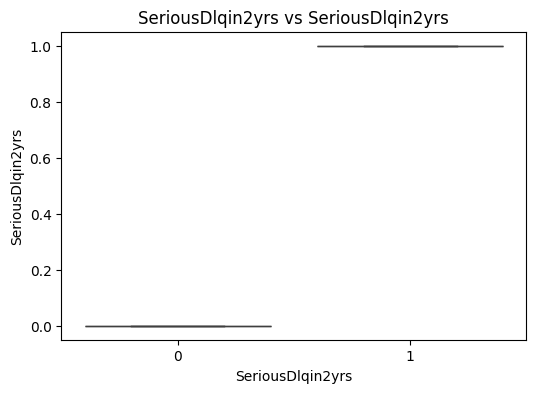

In [115]:
# Graficar las características seleccionadas contra la variable objetivo
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=df_train)
    plt.title(f'{feature} vs SeriousDlqin2yrs')
    plt.show()

**2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information**


In [116]:
# Función para seleccionar características numéricas mediante ANOVA
def select_numerical_features_anova(X, y, k=5):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    return selector.get_support(indices=True)

In [117]:
# Función para seleccionar características categóricas mediante Información Mutua
def select_categorical_features_mutual_info(X, y, k=5):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    return selector.get_support(indices=True)

In [118]:
# Aplicar las funciones para seleccionar características
numerical_features_anova = select_numerical_features_anova(X_train, y_train)
categorical_features_mutual_info = select_categorical_features_mutual_info(X_train, y_train)

In [119]:
# Mostrar las características seleccionadas
print("Características numéricas seleccionadas por ANOVA:", X_train.columns[numerical_features_anova])
print("Características categóricas seleccionadas por Información Mutua:", X_train.columns[categorical_features_mutual_info])

Características numéricas seleccionadas por ANOVA: Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')
Características categóricas seleccionadas por Información Mutua: Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')


**3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)**

In [120]:
# Crear un modelo intermedio (por ejemplo, Random Forest)
model = RandomForestClassifier(random_state=42)

# Inicializar SelectFromModel con el modelo intermedio
selector = SelectFromModel(model)

# Ajustar el selector a los datos de entrenamiento
selector.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features_intermediate_model = X_train.columns[selector.get_support()]

# Mostrar las características seleccionadas
print("Características seleccionadas por SelectFromModel:", selected_features_intermediate_model)

Características seleccionadas por SelectFromModel: Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


**4. Selección de las mejores features empleando RFE.**

In [121]:
# Crear un modelo de clasificación (por ejemplo, Random Forest)
model = RandomForestClassifier(random_state=42)

# Inicializar RFE con el modelo de clasificación y el número deseado de características a seleccionar
rfe = RFE(estimator=model, n_features_to_select=5, step=1)

# Ajustar RFE a los datos de entrenamiento
rfe.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features_rfe = X_train.columns[rfe.support_]

# Mostrar las características seleccionadas
print("Características seleccionadas por RFE:", selected_features_rfe)

Características seleccionadas por RFE: Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


**5. Selección de las mejores features empleando SFS.**

In [122]:
# Crear un modelo de clasificación (por ejemplo, Random Forest)
model = RandomForestClassifier(random_state=42)

# Inicializar SFS con el modelo de clasificación y el número deseado de características a seleccionar
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward')

# Ajustar SFS a los datos de entrenamiento
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features_sfs = X_train.columns[sfs.get_support()]

# Mostrar las características seleccionadas
print("Características seleccionadas por SFS:", selected_features_sfs)

Características seleccionadas por SFS: Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


**6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.**

In [123]:

# Combinar todas las características seleccionadas de los pasos anteriores
all_selected_features = np.concatenate([numerical_features_anova,
                                        categorical_features_mutual_info,
                                        selected_features_intermediate_model,
                                        selected_features_rfe,
                                        selected_features_sfs])

# Contar la frecuencia de cada característica seleccionada
feature_votes = Counter(all_selected_features)

# Seleccionar las características con mayor número de votos
best_features_hard_voting = [feature for feature, count in feature_votes.items() if count >= 3]  # Ajusta este valor según tus necesidades

# Mostrar las características seleccionadas por hard-voting
print("Características seleccionadas por hard-voting:", best_features_hard_voting)

Características seleccionadas por hard-voting: ['NumberOfTimes90DaysLate']


 ### 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.



In [124]:
# Definir los tres modelos a comparar
models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42))
]

In [125]:

# Métrica de interés (recall medio en este caso)
scoring = 'recall'

In [126]:
# Lista de todas las características seleccionadas anteriormente
all_selected_features = [numerical_features_anova,
                         categorical_features_mutual_info,
                         selected_features_intermediate_model,
                         selected_features_rfe,
                         selected_features_sfs,
                         best_features_hard_voting]

In [127]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [128]:
# Diccionario para almacenar el rendimiento de cada modelo con cada selección de características
results = {}

# Iterar sobre cada modelo
for model_name, model in models:
    # Iterar sobre cada selección de características
    for features in all_selected_features:
        # Realizar validación cruzada y calcular la métrica de interés
        scores = cross_val_score(model, X_train[features], y_train, cv=5, scoring=scoring)
        results[(model_name, tuple(features))] = scores.mean()

# Seleccionar el modelo y la selección de características que obtuvieron el mejor rendimiento
best_model, best_features = max(results, key=results.get)
best_model_name = best_model[0]

# Mostrar el mejor modelo y la mejor selección de características
print("El mejor modelo es:", best_model_name)
print("La mejor selección de características es:", best_features)


KeyError: "None of [Index([0, 1, 2, 6, 8], dtype='int64')] are in the [columns]"

### 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [129]:
# Obtener el mejor modelo seleccionado
best_model_name, best_features = best_model

# Obtener el mejor modelo con sus características
best_model = None
if best_model_name == 'RandomForest':
    best_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'LogisticRegression':
    best_model = LogisticRegression(random_state=42)
elif best_model_name == 'SVC':
    best_model = SVC(random_state=42)

# Definir la cuadrícula de hiperparámetros para el mejor modelo
param_grid = {...}  # Define la cuadrícula de hiperparámetros adecuada para el modelo seleccionado

# Realizar búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train[best_features], y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model_optimized = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_test = best_model_optimized.predict(X_test[best_features])
recall_test = recall_score(y_test, y_pred_test)

print("Recall en el conjunto de prueba con el modelo optimizado:", recall_test)

NameError: name 'best_model' is not defined

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [130]:
# 1. Ajustar un modelo de PCA y seleccionar un número de componentes
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada

# 2. Transformar el conjunto de entrenamiento y el conjunto de prueba utilizando las componentes seleccionadas
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Entrenar el modelo ganador de la parte general con las características transformadas por PCA
random_forest_model_pca = RandomForestClassifier(random_state=42)
random_forest_model_pca.fit(X_train_pca, y_train)

# 4. Evaluar el modelo en el conjunto de prueba
y_pred_test_pca = random_forest_model_pca.predict(X_test_pca)
recall_test_pca = recall_score(y_test, y_pred_test_pca)

print("Recall en el conjunto de prueba con PCA:", recall_test_pca)

Recall en el conjunto de prueba con PCA: 0.0718562874251497
